In [1]:
import pandas as pd

In [201]:
cd ~/workspace/theislab/mubind-benchmark/notebooks/pipeline_singlecell/02_results

/home/ilibarra/workspace/theislab/mubind-benchmark/notebooks/pipeline_singlecell/02_results


In [202]:
ll ../

total 1356
drwxrwxr-x 2 ilibarra   4096 Jun 11 18:38 00_preprocessing/
drwxrwxr-x 4 ilibarra   4096 Jun 18 23:48 01_train_n_predict/
drwxrwxr-x 2 ilibarra   4096 Jun 11 18:38 02_results/
drwxrwxr-x 2 ilibarra   4096 Jun 18 23:50 __pycache__/
drwxrwxr-x 2 ilibarra   4096 Jun 11 22:19 results/
-rw-rw-r-- 1 ilibarra 585787 Jun 19 09:01 results_mubind.csv
-rw-rw-r-- 1 ilibarra 768696 Jun 13 01:43 results_scbasset.csv
-rw-rw-r-- 1 ilibarra   4948 Jun 18 23:50 utils.py


In [204]:
df = pd.read_csv('../results_scbasset.csv',
                 index_col=0)
df

,dataset,feat_selection,loss_key,group,metric,value,model_path,fold_key,model,n_epochs
0,pbmc,random,poisson,train,roc_auc,0.636187,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10
1,pbmc,random,poisson,train,roc_auc_multi,0.525161,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10
2,pbmc,random,poisson,train,pr_auc,0.107659,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10
3,pbmc,random,poisson,train,pr_auc_multi,0.077117,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10
4,pbmc,random,poisson,train,r2,-0.121580,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10
...,...,...,...,...,...,...,...,...,...,...
10,noack_2022,episcanpy,bce,test,roc_auc,0.661295,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,scBasset,10
11,noack_2022,episcanpy,bce,test,roc_auc_multi,0.500000,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,scBasset,10
12,noack_2022,episcanpy,bce,test,pr_auc,0.014053,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,scBasset,10
13,noack_2022,episcanpy,bce,test,pr_auc_multi,0.002838,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,scBasset,10


In [203]:
df_mubind = pd.read_csv('../results_mubind.csv',
                 index_col=0)

In [205]:
import numpy as np
import seaborn as sns
res = pd.concat([df, df_mubind])
res['k'] = np.where(res['model'] == 'scBasset',
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['loss_key'] + ':' + res['model'],
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['model'])

In [206]:
res[(res['dataset'] == 'pbmc') & (res['metric'] == 'roc_auc') & (res['group'] == 'test')]

,dataset,feat_selection,loss_key,group,metric,value,model_path,fold_key,model,n_epochs,time,model_type,n_obs,k
10,pbmc,random,poisson,test,roc_auc,0.434609,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,pbmc:random:poisson:scBasset
10,pbmc,random,poisson,test,roc_auc,0.700567,/home/ilibarra/workspace/theislab/mubind/data/...,fold_1,scBasset,10.0,NaN,NaN,NaN,pbmc:random:poisson:scBasset
10,pbmc,random,poisson,test,roc_auc,0.583359,/home/ilibarra/workspace/theislab/mubind/data/...,fold_2,scBasset,10.0,NaN,NaN,NaN,pbmc:random:poisson:scBasset
10,pbmc,random,poisson,test,roc_auc,0.610839,/home/ilibarra/workspace/theislab/mubind/data/...,fold_4,scBasset,10.0,NaN,NaN,NaN,pbmc:random:poisson:scBasset
10,pbmc,random,poisson,test,roc_auc,0.825191,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,scBasset,10.0,NaN,NaN,NaN,pbmc:random:poisson:scBasset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,pbmc,episcanpy,NaN,test,roc_auc,0.675460,/home/ilibarra/workspace/theislab/mubind/data/...,fold_2,mubind,NaN,48.396512,pwms,1000.0,pbmc:episcanpy:mubind
10,pbmc,episcanpy,NaN,test,roc_auc,0.646029,/home/ilibarra/workspace/theislab/mubind/data/...,fold_4,mubind_graph,NaN,162.689429,pwms,1000.0,pbmc:episcanpy:mubind_graph
10,pbmc,episcanpy,NaN,test,roc_auc,0.675856,/home/ilibarra/workspace/theislab/mubind/data/...,fold_4,mubind,NaN,48.712745,pwms,1000.0,pbmc:episcanpy:mubind
10,pbmc,episcanpy,NaN,test,roc_auc,0.643622,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,mubind_graph,NaN,162.031696,pwms,1000.0,pbmc:episcanpy:mubind_graph


In [207]:
res['k'] = np.where(res['model'] == 'scBasset',
                    res['model'] + ':' + res['feat_selection'] + ':' + res['loss_key'],
                    res['model'] + ':' + res['feat_selection'])

list(res[(res['k'] == 'scBasset:random:bce') & (res['dataset'] == 'pancreatic_endocrinogenesis') & (res['metric'] == 'roc_auc') & (res['n_obs'] == 500)]['model_path']) # .value_counts()

[]

In [208]:
import warnings
warnings.filterwarnings("ignore")


In [209]:
# res['feat_selection'] = np.where(res['model'] == 'mubind', res['model_path'].str.split('/').str[-6], res['feat_selection'])
res


,dataset,feat_selection,loss_key,group,metric,value,model_path,fold_key,model,n_epochs,time,model_type,n_obs,k
0,pbmc,random,poisson,train,roc_auc,0.636187,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,scBasset:random:poisson
1,pbmc,random,poisson,train,roc_auc_multi,0.525161,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,scBasset:random:poisson
2,pbmc,random,poisson,train,pr_auc,0.107659,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,scBasset:random:poisson
3,pbmc,random,poisson,train,pr_auc_multi,0.077117,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,scBasset:random:poisson
4,pbmc,random,poisson,train,r2,-0.121580,/home/ilibarra/workspace/theislab/mubind/data/...,fold_0,scBasset,10.0,NaN,NaN,NaN,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,noack_2022,episcanpy,NaN,test,roc_auc,0.626203,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,mubind,NaN,34.548246,pwms,1000.0,mubind:episcanpy
11,noack_2022,episcanpy,NaN,test,pr_auc,0.009562,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,mubind,NaN,34.548246,pwms,1000.0,mubind:episcanpy
12,noack_2022,episcanpy,NaN,test,r2,0.001799,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,mubind,NaN,34.548246,pwms,1000.0,mubind:episcanpy
13,noack_2022,episcanpy,NaN,test,roc_auc_multi,0.500000,/home/ilibarra/workspace/theislab/mubind/data/...,fold_3,mubind,NaN,34.548246,pwms,1000.0,mubind:episcanpy


In [210]:
res['n_obs'] = res['model_path'].str.split('/').str[-4].str.replace('obs', '').str.split('_').str[0]
# res['value'][res['value'] < 0] = 0

In [211]:
res['model'] = np.where(res['model'].str.contains('mubind'), res['model'] + ':' + res['model_type'], res['model'])

In [212]:
res['model'].value_counts()

model
scBasset             3690
mubind_graph:pwms    1375
mubind:pwms          1360
Name: count, dtype: int64

In [213]:
res['value'][res['value'] < 0] = 0

In [214]:
res['dataset'].value_counts()

dataset
pancreatic_endocrinogenesis    2890
pbmc                           2245
noack_2022                     1290
Name: count, dtype: int64

Text(0, 0.5, 'seconds')

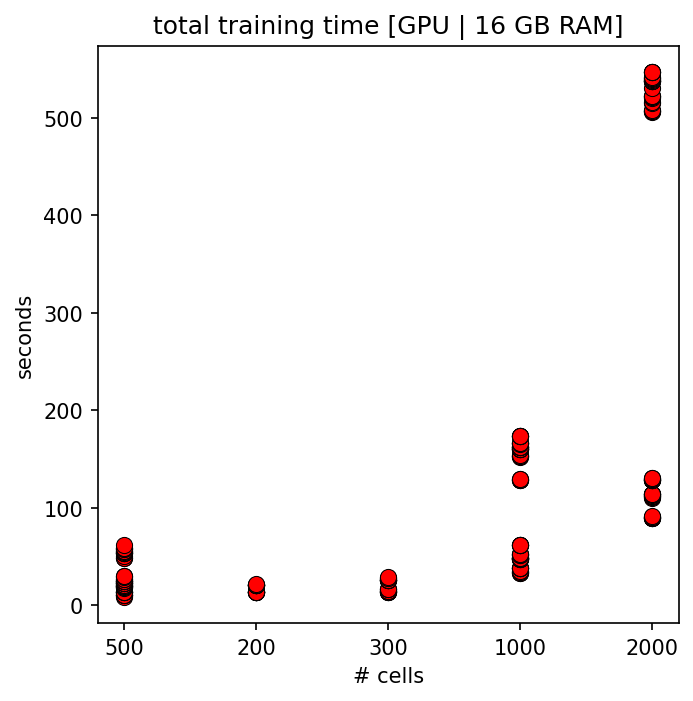

In [215]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 5, 5

df = res[res['model'].str.contains('mubind')].sort_values('time').drop_duplicates('time')
x = df['n_obs']
y = df['time']
plt.scatter(x,
            y,
            s=60,
            lw=.5,
            edgecolors='black',
            color='red')

plt.title('total training time [GPU | 16 GB RAM]')
plt.xlabel('# cells')
plt.ylabel('seconds')

In [242]:
hm_list = []
for dataset_id, grp in res.groupby('dataset'):
    for feat_selection in ['random', 'episcanpy']:
        for group in ['test']: # only testing
            
            for metrics in [['r2', 'roc_auc_multi', 'pr_auc_multi'],]: # 
                            # ['r2', 'roc_auc', 'roc_auc_multi', 'pr_auc', 'pr_auc_multi'],]:
                for metric in metrics:
                    for k, grp2 in grp[(grp['group'] == group) & (grp['metric'] == metric) & (grp['feat_selection'] == feat_selection)].groupby('feat_selection'):
                        # print(grp2['model'].value_counts())
                        grp2['k'] = np.where(grp2['model'] == 'scBasset',
                                            grp2['model'] + ':' + grp2['feat_selection'] + ':' + grp2['loss_key'],
                                            grp2['model'] + ':' + grp2['feat_selection'])

                        grp2['k2'] = grp2['dataset'] + ':' + grp2['k'] #  + ':' + grp2['n_obs'].astype(str)

                        pivot = grp2[['dataset', 'k2', 'value', 'n_obs']].groupby(['dataset', 'k2', 'n_obs']).mean()
                        pivot.columns = [metric,]

                        pivot = pivot.reset_index().pivot(index='k2', columns='n_obs', values=metric)
                        pivot.columns = [metric + '_' + str(c) for c in pivot.columns]

                        hm_list.append(pivot)


hm = pd.concat(hm_list, axis=0)
hm = hm.groupby(hm.index).mean()
hm = hm[sorted(hm.columns, key=lambda x: (''.join(x.split("_")[:-1]), int(x.split("_")[-1])))]

In [243]:
criterion = lambda x: (''.join(x.split(":")[0]), ''.join(x.split(":")[1]))
hm = hm.reindex(sorted(hm.index, key=criterion))

pancreatic_endocrinogenesis (8, 18)
noack_2022 (8, 18)
pbmc (8, 18)


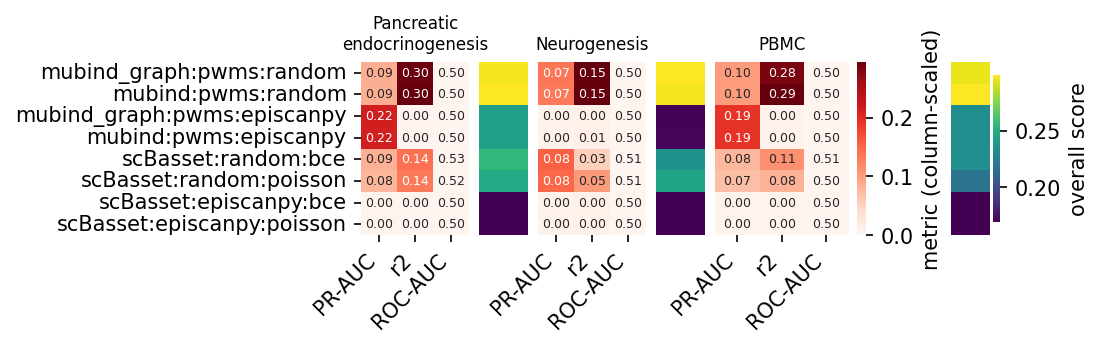

In [279]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6, 1.5
rcParams['pdf.fonttype'] = 42

subset_col = '_2000'

ci = 0

dataset_order = ['pancreatic_endocrinogenesis', 'noack_2022', 'pbmc']
for dataset in dataset_order:
    grp = hm[hm.index.str.contains(dataset)] # grp in hm.groupby(hm.index.astype(str).str.split(':').str[0]):

    print(dataset, grp.shape)
    ax = plt.subplot2grid((1, 12), (0, (ci * 3)), rowspan=1, colspan=2 if ci != 2 else 3)
    grp.index = grp.index.astype(str).str.split(':').str[1:].str.join(':')

    order_index = ['mubind_graph:pwms:random', 'mubind:pwms:random', 'mubind_graph:pwms:episcanpy', 'mubind:pwms:episcanpy',
               'scBasset:random:bce', 'scBasset:random:poisson', 'scBasset:episcanpy:bce', 'scBasset:episcanpy:poisson']
    
    grp = grp.reindex(order_index)
    # remove roc and pr if not multi
    # grp = grp[[c for c]]

    if subset_col is not None:
        grp = grp[[c for c in grp if c.endswith(subset_col)]]

    xticks_format = {'pr_auc_multi_2000': 'PR-AUC', 'r2_2000': 'r2', 'roc_auc_multi_2000': 'ROC-AUC'}
    grp.columns = [xticks_format[c] for c in grp]

    overall = grp.copy()
    # for c in overall:
    #     overall[c] = (grp[c] - grp[c].min()) / (grp[c].max() - grp[c].min())    
    overall = overall.mean(axis=1)

    # scale ROC-AUC to align with other metrics
    grp_scaled = grp.copy()
    for c in grp_scaled:
        if 'ROC-AUC' in c:
            grp_scaled[c] -= .5 * 2

    # plt.title(title_format[dataset], fontsize=8)

    sns.heatmap(grp_scaled,
                cmap='Reds',
                yticklabels=ci == 0,
                xticklabels=True,
                cbar=ci == 2,
                annot=grp,
                vmin=0,
                fmt='.2f',
                annot_kws={'fontsize': 6},
                cbar_kws={'label': 'metric (column-scaled)'},
                ax=ax)
    plt.xticks(rotation=45, ha='right')


    plt.ylabel('')

    title_format = {'pancreatic_endocrinogenesis': 'Pancreatic\nendocrinogenesis', 'noack_2022': 'Neurogenesis', 'pbmc': 'PBMC'}
    plt.title(title_format[dataset], fontsize=8)

    ax2 = plt.subplot2grid((1, 12), (0, (ci * 3 + (2 if ci != 2 else 4))), rowspan=1, colspan=1)
    sns.heatmap(pd.DataFrame(overall), cmap='viridis', yticklabels=0, xticklabels=0, cbar=ci == 2, cbar_kws={'label': 'overall score'}, ax=ax2)
    plt.ylabel('')
    ci += 1
    # break

plt.savefig('../../../output/mubind_v_scbasset.pdf')
plt.show()
# break

<Figure size 900x225 with 0 Axes>

k2
mubind:pwms:episcanpy          0.314082
mubind:pwms:random             0.387518
mubind_graph:pwms:episcanpy    0.314478
mubind_graph:pwms:random       0.348695
scBasset:episcanpy:bce         0.102294
scBasset:episcanpy:poisson     0.109725
scBasset:random:bce            0.752244
scBasset:random:poisson        0.570924
dtype: float64

In [111]:
hm[hm.index == 'noack_2022:mubind:pwms:random']

,r2_1000,r2_2000,r2_500,roc_auc_1000,roc_auc_2000,roc_auc_500,roc_auc_multi_1000,roc_auc_multi_2000,roc_auc_multi_500,pr_auc_1000,...,roc_auc_300,roc_auc_multi_100,roc_auc_multi_200,roc_auc_multi_300,pr_auc_100,pr_auc_200,pr_auc_300,pr_auc_multi_100,pr_auc_multi_200,pr_auc_multi_300
k2,,,,,,,,,,,,,,,,,,,,,
noack_2022:mubind:pwms:random,0.172887,0.150086,0.17651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,0.538719,0.561169,0.500658,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,NaN,NaN,NaN,0.500857,0.499549,0.511029,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,0.172887,0.150086,0.17651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,NaN,NaN,NaN,0.500857,0.499549,0.511029,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
noack_2022:mubind:pwms:random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,r2_1000,r2_2000,r2_500,roc_auc_1000,roc_auc_2000,roc_auc_500,roc_auc_multi_1000,roc_auc_multi_2000,roc_auc_multi_500,pr_auc_1000,...,r2_2000,r2_500,roc_auc_multi_100,roc_auc_multi_1000,roc_auc_multi_2000,roc_auc_multi_500,pr_auc_multi_100,pr_auc_multi_1000,pr_auc_multi_2000,pr_auc_multi_500
k2,,,,,,,,,,,,,,,,,,,,,
mubind:pwms:random,0.172887,0.150086,0.176510,0.538719,0.561169,0.500658,0.500857,0.499549,0.511029,0.085086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mubind_graph:pwms:random,0.175795,0.149792,0.192837,0.531449,0.532681,0.517974,0.506792,0.501958,0.504819,0.091037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scBasset:random:bce,0.053137,0.027111,0.058823,0.697951,0.713799,0.719247,0.508892,0.508830,0.514234,0.216253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scBasset:random:poisson,0.073330,0.052735,0.020159,0.710701,0.716888,0.674680,0.502307,0.505148,0.497219,0.230074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mubind:pwms:episcanpy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004983,0.000120,NaN,0.5,0.5,0.500000,NaN,0.283333,0.193333,0.068267
mubind_graph:pwms:episcanpy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004781,0.000007,NaN,0.5,0.5,0.500000,NaN,0.283333,0.193333,0.068267
scBasset:episcanpy:bce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003991,0.000000,0.550283,0.5,0.5,0.494377,0.527894,0.002432,0.004112,0.000376
scBasset:episcanpy:poisson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003534,0.000000,0.540069,0.5,0.5,0.499496,0.521871,0.002432,0.004084,0.000379


<Axes: ylabel='k2-n_obs'>

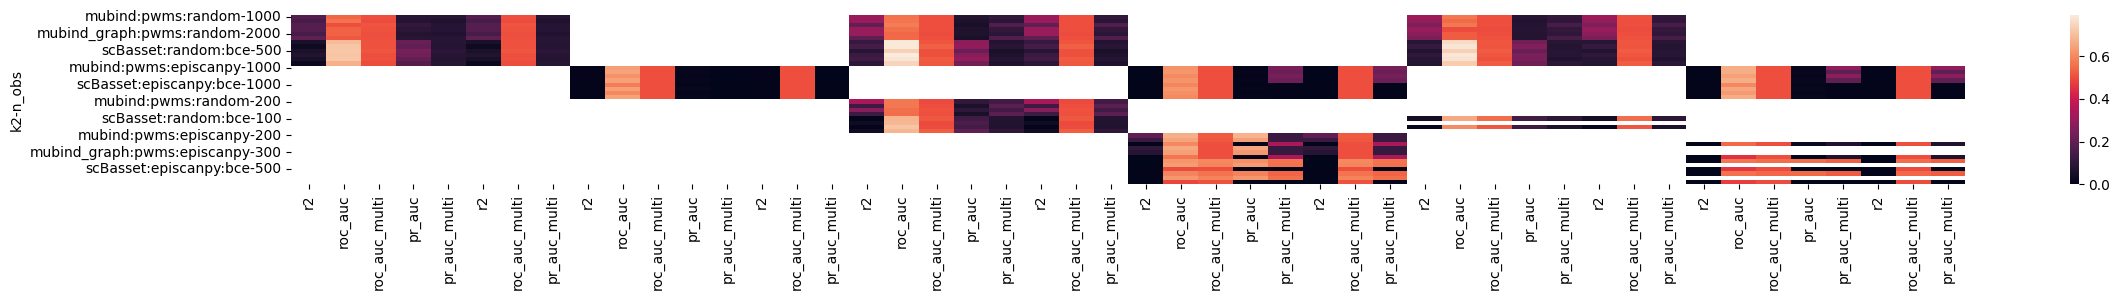

In [50]:
sns.heatmap(hm)

In [27]:
grp2.groupby('k2').mean()

TypeError: agg function failed [how->mean,dtype->object]

noack_2022 train


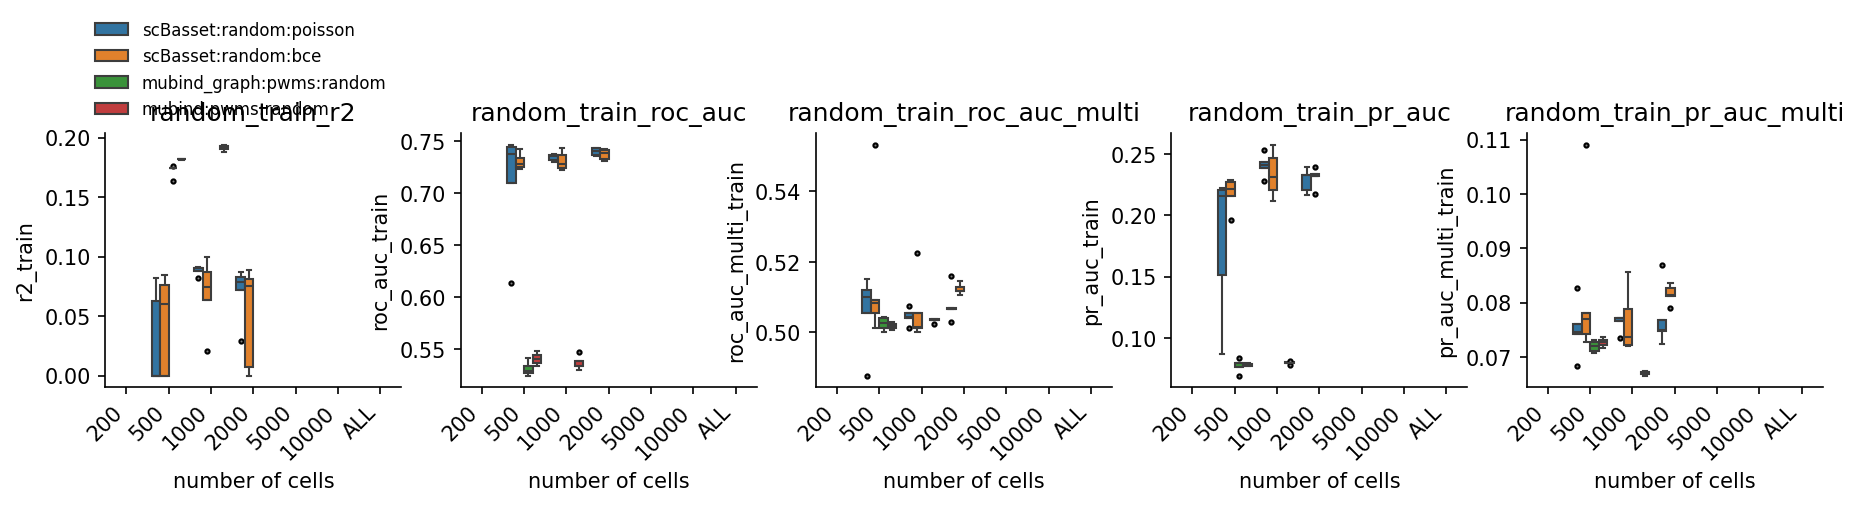

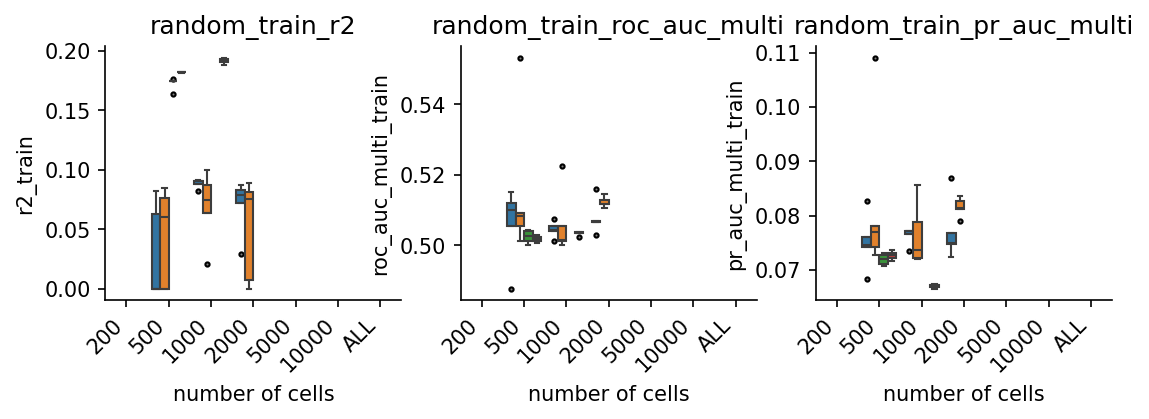

noack_2022 test


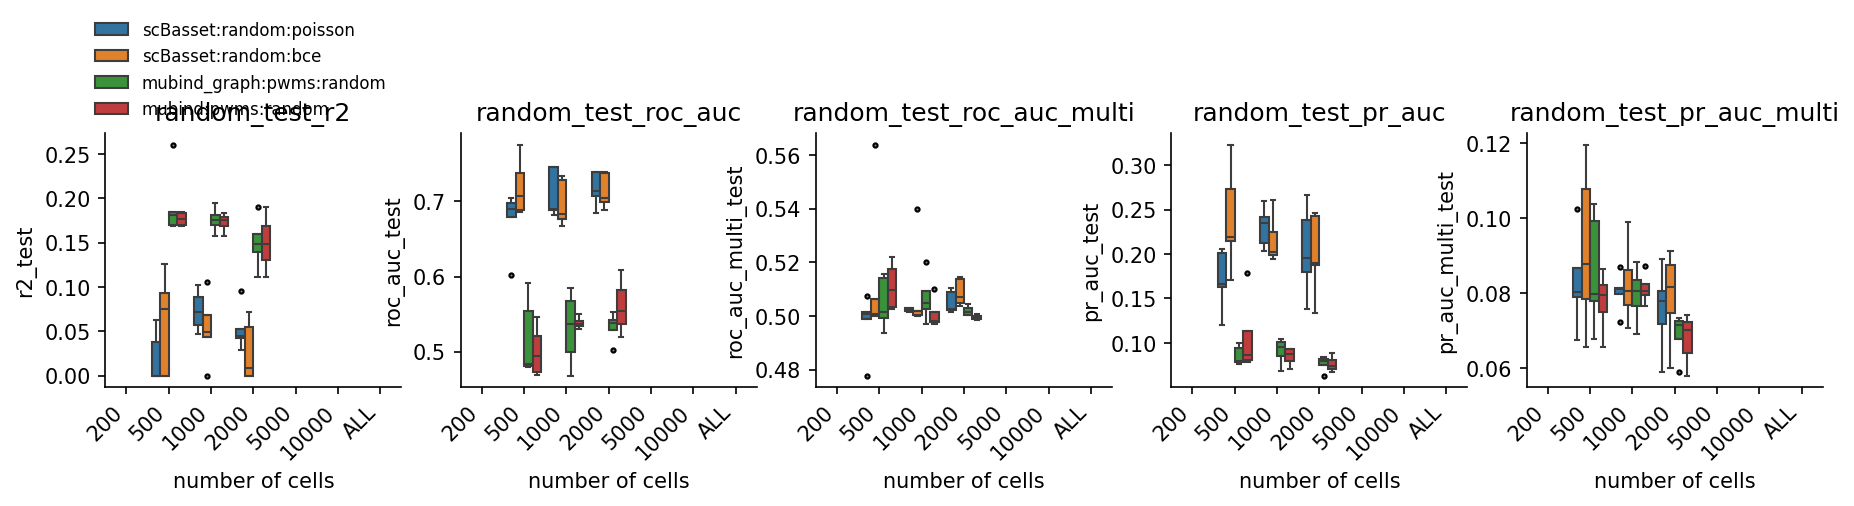

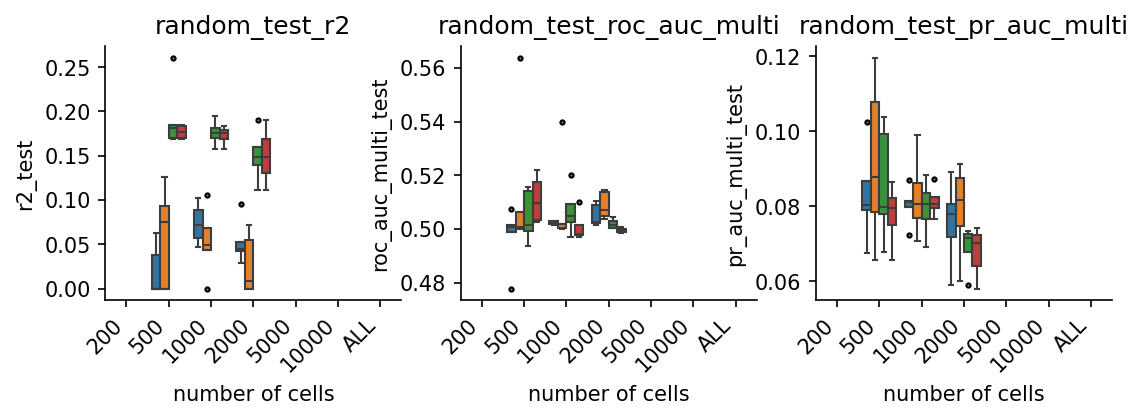

noack_2022 train


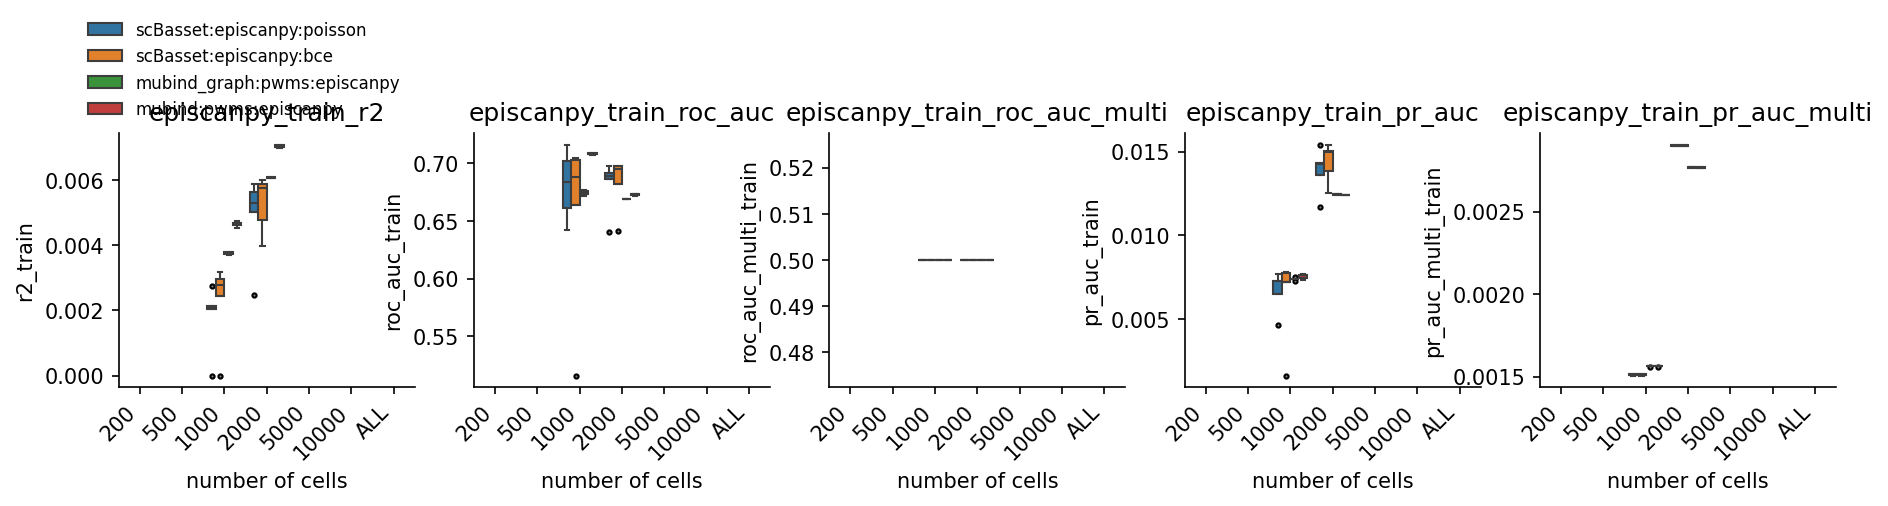

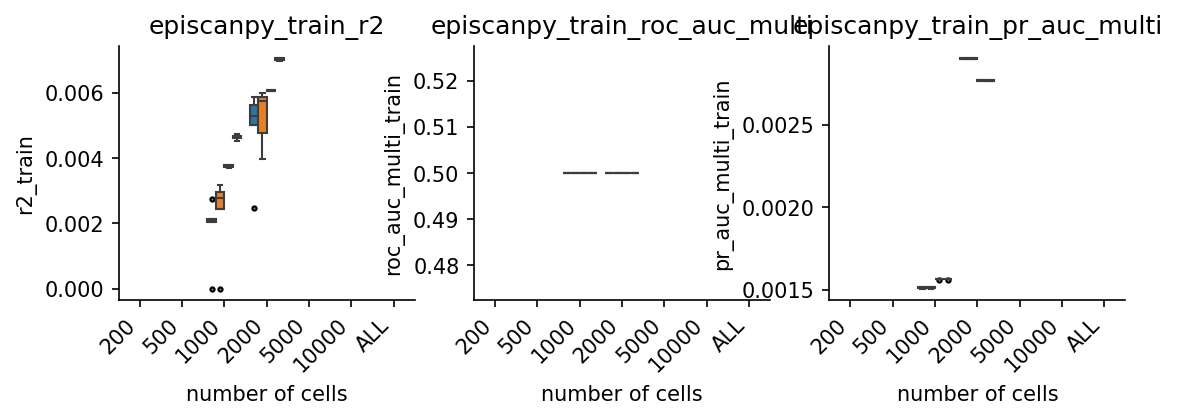

noack_2022 test


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x79c0153b6dc0>>
Traceback (most recent call last):
  File "/home/ilibarra/miniconda3/envs/mubind/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


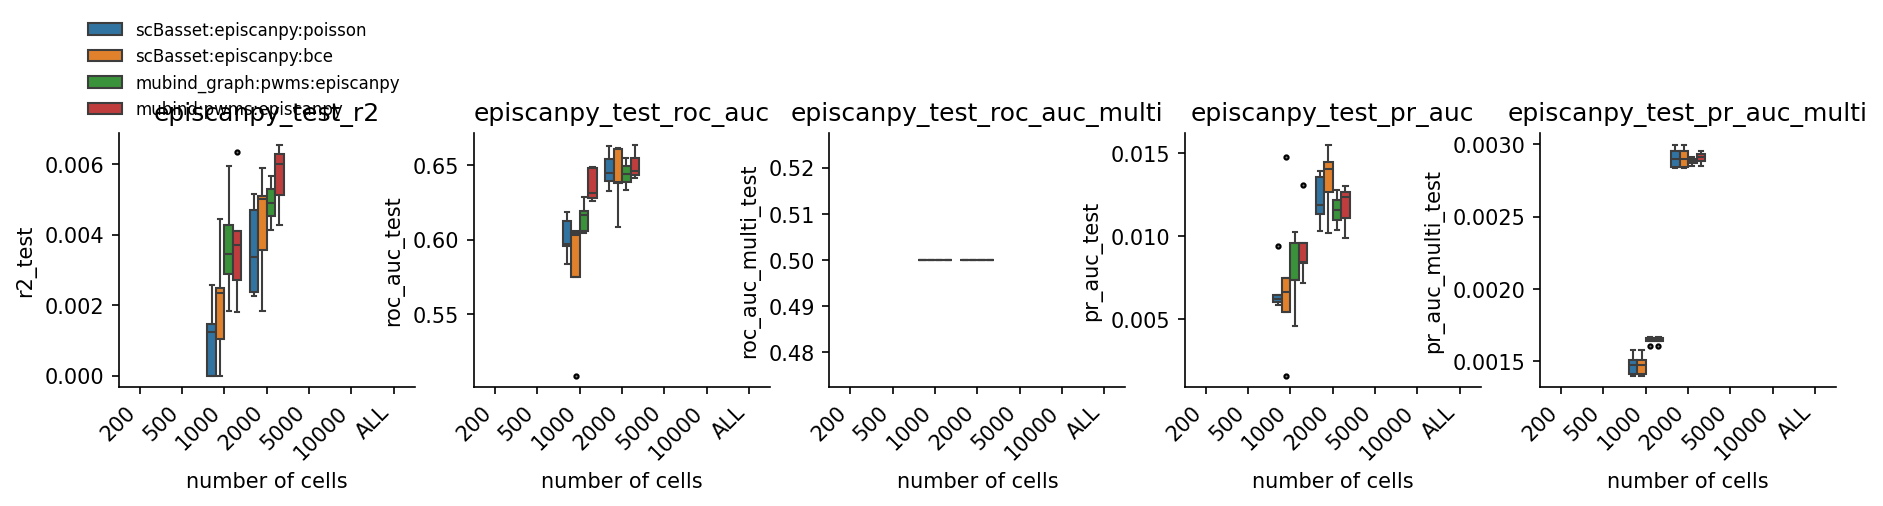

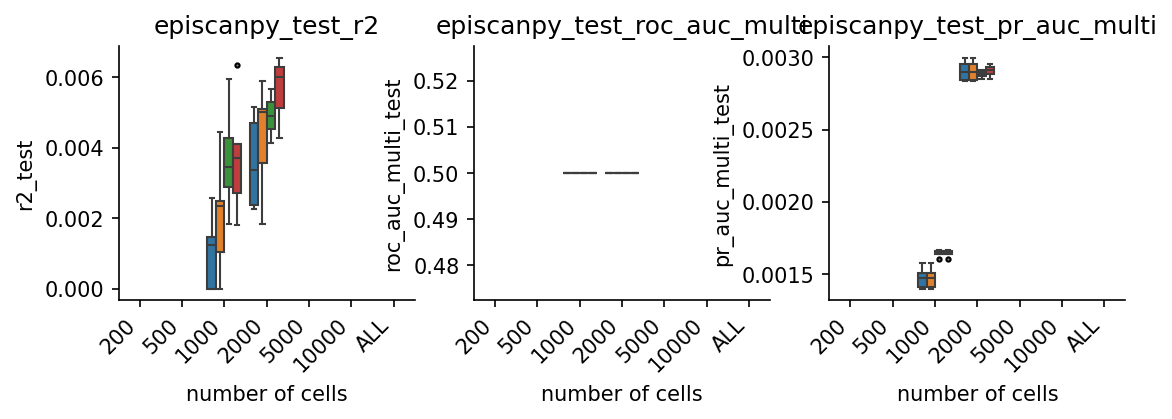

pancreatic_endocrinogenesis train


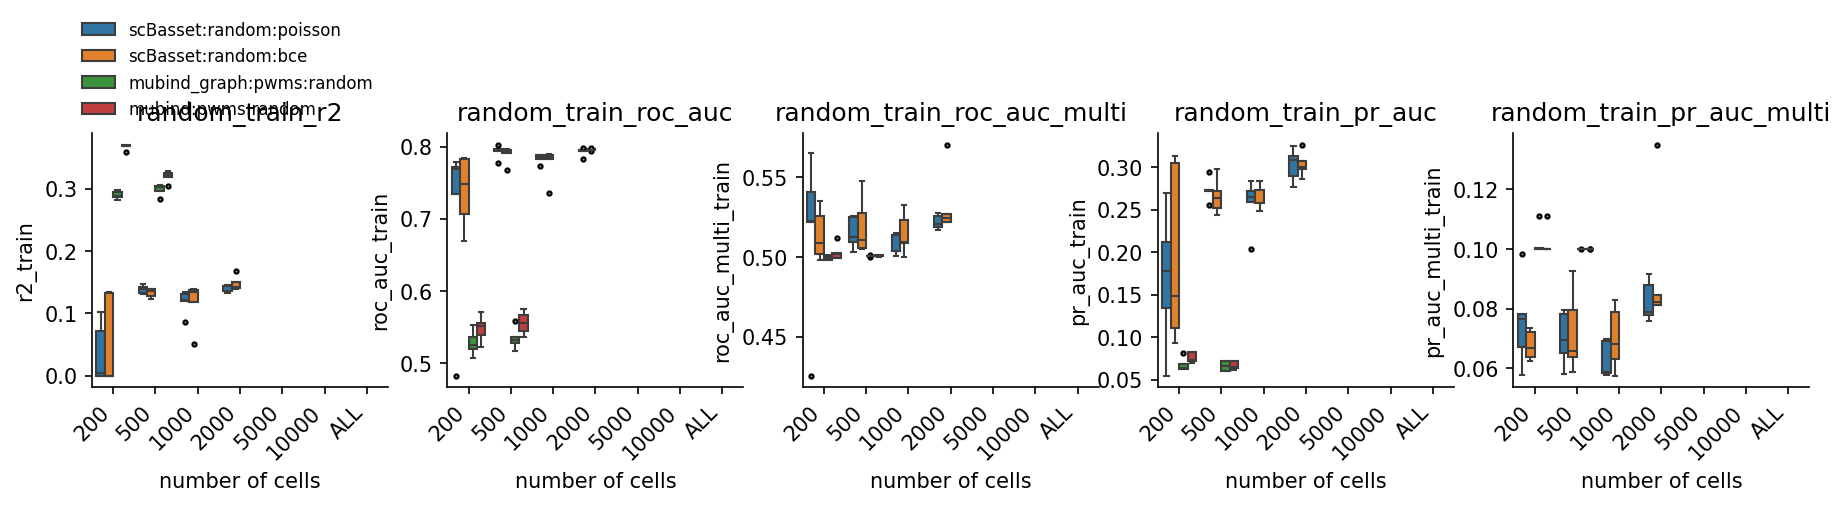

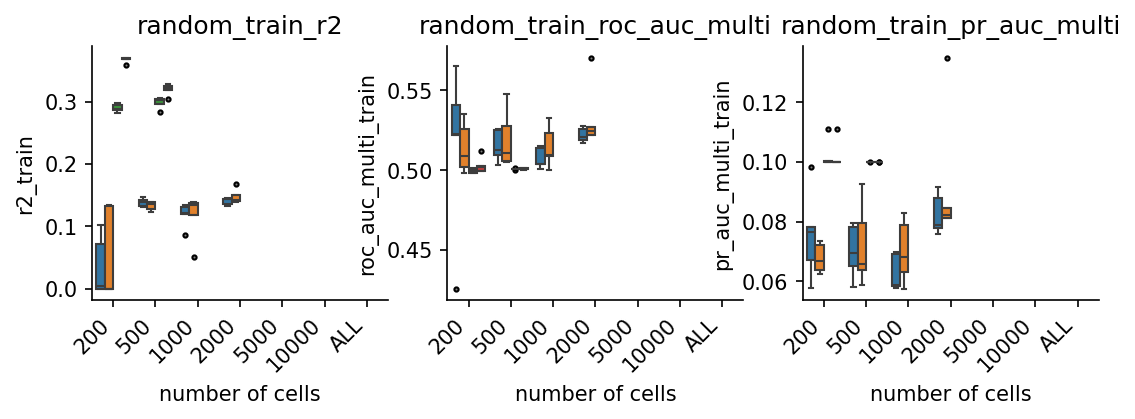

pancreatic_endocrinogenesis test


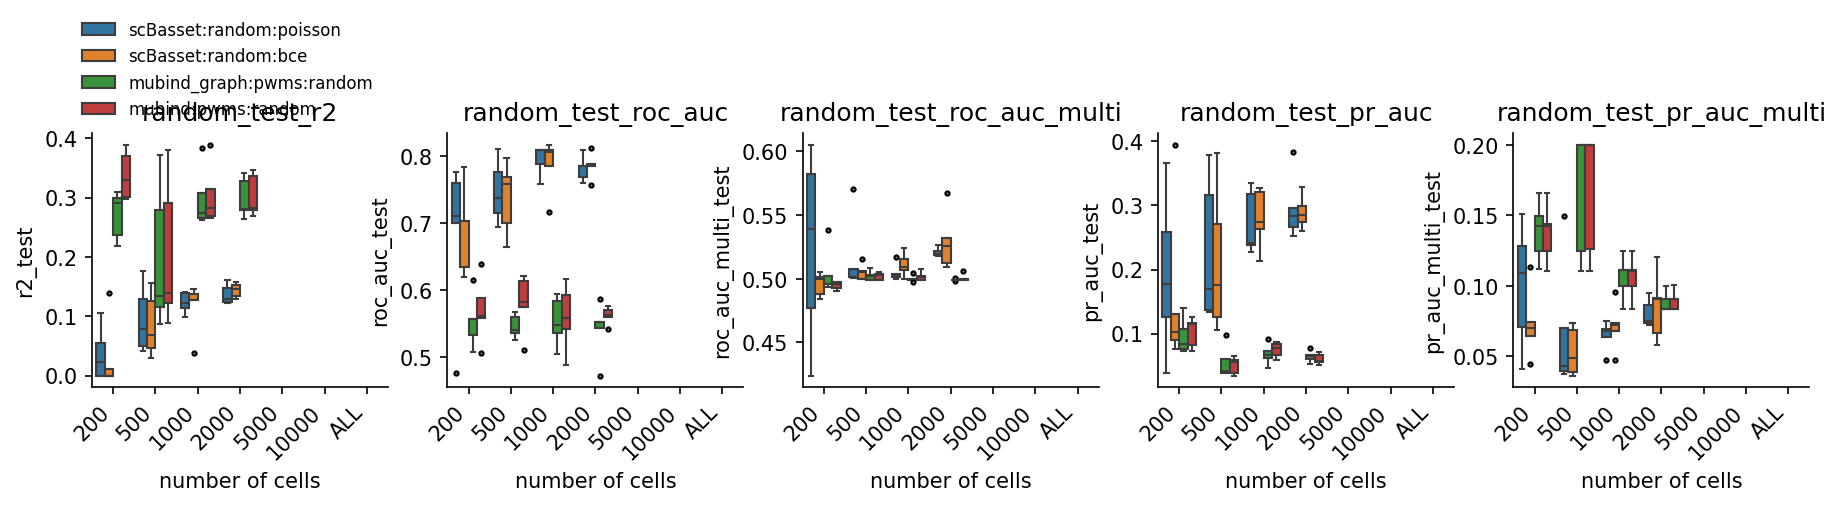

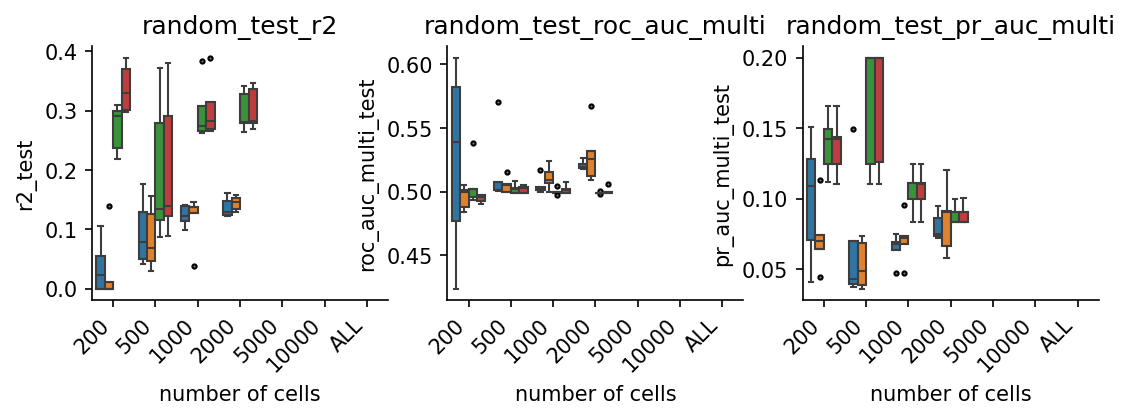

pancreatic_endocrinogenesis train


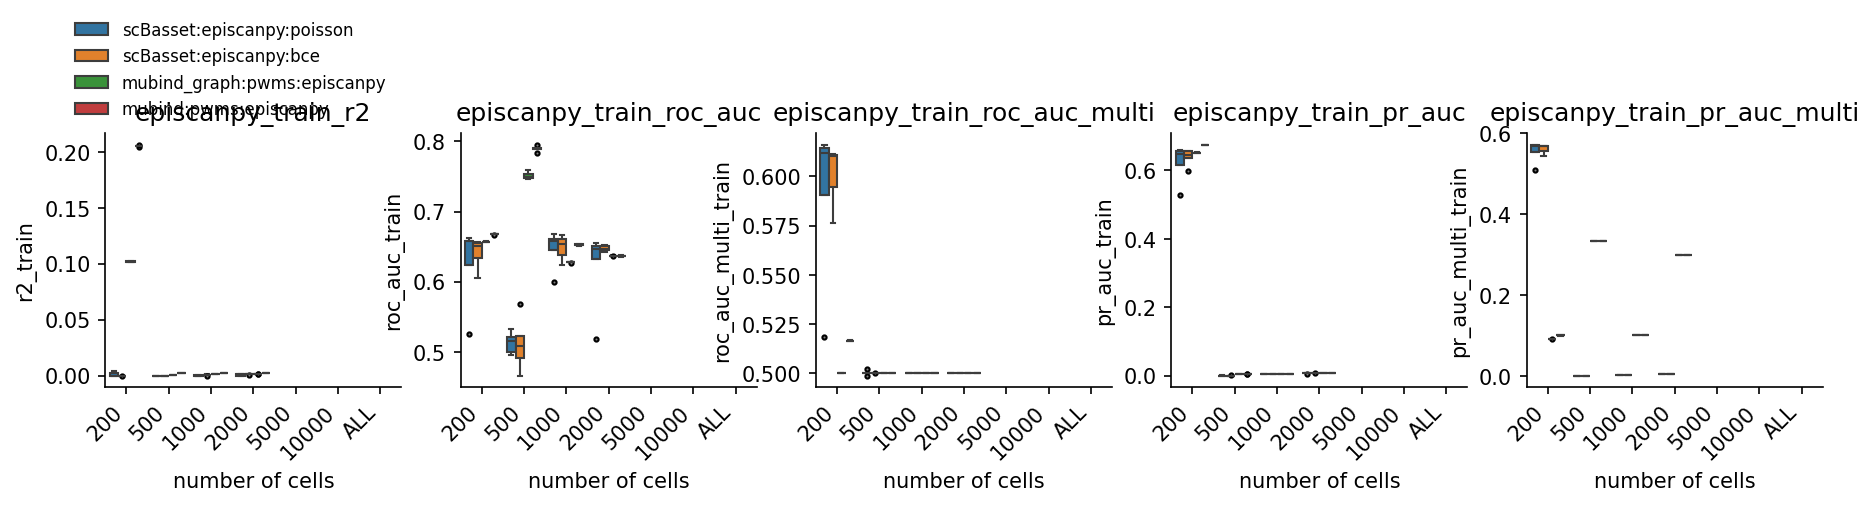

In [280]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 27, 2.2

for dataset_id, grp in res.groupby('dataset'):
    for feat_selection in ['random', 'episcanpy']:
        for group in ['train', 'test']:
            print(dataset_id, group)
            pi = 0
            for metrics in [['r2', 'roc_auc', 'roc_auc_multi', 'pr_auc', 'pr_auc_multi'],
                            ['r2', 'roc_auc_multi', 'pr_auc_multi']]:
                for metric in metrics:
                    for k, grp2 in grp[(grp['group'] == group) & (grp['metric'] == metric) & (grp['feat_selection'] == feat_selection)].groupby('feat_selection'):
                        # print(metric, k)
                        # print(grp2['model'].value_counts())
                        # if k[-1] != 'test':
                        #     continue
                        # print(grp2['model'].value_counts())
                        grp2['k'] = np.where(grp2['model'] == 'scBasset',
                                            grp2['model'] + ':' + grp2['feat_selection'] + ':' + grp2['loss_key'],
                                            grp2['model'] + ':' + grp2['feat_selection'])

                        grp2['k2'] = grp2['k'] + ':' + grp2['n_obs'].astype(str)

                        grp2 = grp2.sort_values('n_epochs', ascending=False) # .groupby('k2') # .head(1)

                        ax = plt.subplot(1, 9, pi + 1)
                        # sns.pointplot(grp2.reset_index(drop=True),
                        #               x='n_obs',
                        #               y='value',
                        #               hue='k',
                        #               scale=.9,
                        #               ax=ax,
                        #               linestyles=['-', '--', '-'],
                        #               markers=['o','v', 's'],
                        #               palette=['lightgray', 'gray', 'green']) 

                        flierprops = dict(marker='o', markerfacecolor='gray',
                                        markersize=2, 
                                        markeredgecolor='black')
                        sns.boxplot(data=grp2.reset_index(),
                                    x='n_obs',
                                    y='value',
                                    # size=5,
                                    order=['200', '500', '1000', '2000', '5000', '10000', 'ALL'],
                                    # hue_order=['scBasset:random:poisson', 'mubind:mubind_output'], #  'scBasset:episcanpy:poisson', 'scBasset:episcanpy:bce', 'mubind:mubind_output'],
                                    ax=ax,
                                    flierprops=flierprops,
                                    # palette={"left": "cyan", "right": "red"},
                                    hue='k')
                                    # scale=.9)
                                    # linestyles=['-', '--', '-'],
                                    # markers=['o','v', 's'],
                                    # palette=['lightgray', 'gray', 'green']) 
                        plt.xticks(rotation=45, ha='right')
                        plt.xlabel('number of cells')
                        plt.ylabel(metric + '_' + group)
                        plt.legend(fontsize=6)
                        plt.title(k + '_' + group + '_' + metric)
                        ax.spines[['right', 'top']].set_visible(False)
                        ax.legend(loc='upper right',
                                bbox_to_anchor=(1, 1.5),
                                frameon=False,
                                fontsize=8)
                        if pi != 0:
                            ax.get_legend().remove()
                        pi += 1
                        # plt.tight_layout()

                        # if grp2[grp2['model'] == 'mubind_graph:pwms'].shape[0] != 0:
                        #     plt.show()
                        #     assert False


                plt.show()
            
            # assert 0
        # assert False